<a href="https://colab.research.google.com/github/FrenteBW/Pima-Indians-Insulin-regression/blob/main/Pima_Indians_Insulin_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set 출처 & 구성

**데이터셋 출처**
Pima Indians Diabetes Database | Kaggle
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

**데이터 구성**

Pregnancies : 임신 횟수

Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

BloodPressure : 이완기 혈압 (mm Hg)

SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

Insulin : 2시간 혈청 인슐린 (mu U / ml)

BMI : 체질량 지수 (체중kg / 키(m)^2)

DiabetesPedigreeFunction : 당뇨병 혈통 기능

Age : 나이

Outcome : 1은 당뇨병을 의미, 0은 당뇨병이 아님을 의미

**데이터 분석 목적**
임신 횟수, 글루코스 수치, 혈압, 피부 두께, 체질량 지수, 나이, 당뇨병 여부 등의 데이터를 통해 인슐린 수치를 지도 학습 기법이 regression을 통해 예측한다. 

# 사용할 Data set과 Library 로드

In [ ]:
import pandas as pd #데이터 분석을 위한 라이브러리
import numpy as np #고성능의 수치계산, 행렬이나 대규모 다차원 배열을 쉽게 처리하기 위한 라이브러리
import seaborn as sns #데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt #데이터 시각화 라이브러리

In [ ]:
df = pd.read_csv("/content/diabetes.csv") #데이터 불러오기, 경로는 파일에서 경로복사하는게 편함
df.shape 

(768, 9)

In [ ]:
df.head() #data set의 간략한 참조

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info() #data set Column의 기본 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
train = df[df["Insulin"] > 0].copy() # train 세트를 만들기. Insulin 값이 0 이 아닌 값 들을 train set으로 설정.
train.shape

(394, 9)

In [ ]:
test = df[df["Insulin"] == 0].copy() # test 세트 만들기. Insulin 값이 0 인 값 들을 test 값으로 설정. 회귀를 통해 값을 채워 넣어주어야 할 값
test.shape

(374, 9)

In [ ]:
feature_names = test.columns.tolist() # Insulin 값을 제외한 나머지 값 들을 feature names에 저장
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
label_name = "Insulin" #Insulin 값은 label name에 저장
label_name

'Insulin'

**학습, 예측 데이터셋 나누기**

In [ ]:
X_train = train[feature_names] #학습에 사용할 문제
X_train.shape

(394, 8)

In [ ]:
y_train = train[label_name] #학습에 사용할 답
y_train.shape

(394,)

In [ ]:
X_test = test[feature_names] #실제로 사용할 문제
X_test.shape

(374, 8)

In [ ]:
y_test = test[label_name] #실제로 사용한 문제에 대한 답
y_test.shape

(374,)

# 머신러닝 알고리즘 사용하기

In [ ]:
from sklearn.tree import DecisionTreeRegressor  #regressor 알고리즘 사용

model = DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

In [ ]:
model.fit(X_train, y_train) #학습

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict #학습 세트의 오차 측정

y_predict = cross_val_predict(model, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


array([ 25., 480.,  55., 145., 495., 130., 220., 285., 176., 155., 237.,
       120.,  56., 415., 185.,  25.,  99., 215., 265., 210.,  90., 265.,
        59., 495., 125., 277., 220.,  94., 180.,  44., 115.,  86., 135.,
       291., 115.,  75., 100., 480.,  78.,  57., 180., 155.,  15.,  54.,
       220., 115., 330., 122.,  66.,  84., 168., 231.,  32., 194.,  58.,
       579.,  75.,  54., 106., 120., 106.,  96., 321.,  49., 318.,  70.,
        87., 152., 158., 291.,  99., 145., 231., 167., 100., 165.,  25.,
       210., 190., 150., 110.,  87., 293.,  66.,  49., 342., 100.,  89.,
        49., 846., 110., 192., 204., 130., 235., 182., 191., 166.,  49.,
       105., 207., 115., 250.,  74., 140., 215., 152., 167., 215.,  71.,
        56., 249., 120., 540.,  43.,  37., 207., 210., 130., 465., 310.,
       146.,  40., 190., 392., 237., 200., 190., 142.,  60., 110.,  89.,
       182., 144., 495., 600., 235., 150.,  86., 200., 125., 176., 210.,
       250., 293.,  79., 152.,  46., 291.,  48.,  7

In [ ]:
(y_predict == y_train).sum() #정답을 정확히 맞춘 갯수, 회귀는 수치를 정확히 맞추기는 어렵기에 낮게 나옴

3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


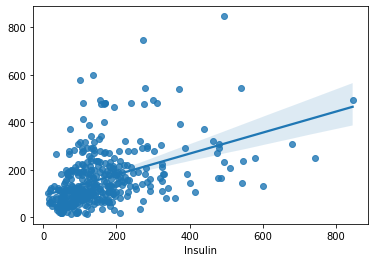

In [ ]:
sns.regplot(y_train, y_predict) #regplot으로 회귀선 구하기, 200 이상 값들은 오차가 큰 편. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


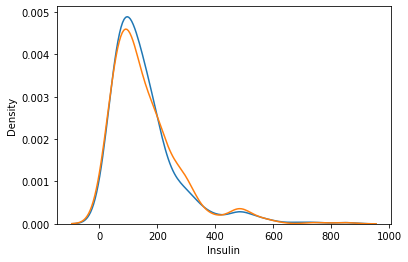

In [ ]:
sns.distplot(y_train, hist=False, label="train") #정답 값과 예측 값의 분포 그리기
sns.distplot(y_predict, hist=False, label="predict")

# 오차 구하기

In [ ]:
error = abs(y_train - y_predict) #오차의 평균 값(MAE)
error.mean()

86.57106598984771

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


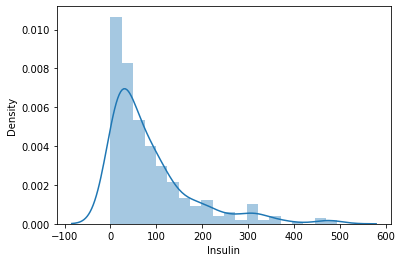

In [ ]:
sns.distplot(error) #MAE 시각화

In [ ]:
np.sqrt(((y_train - y_predict) ** 2).mean()) #RMSE 값 구하기

126.89512636995443

# 학습 결과 분석

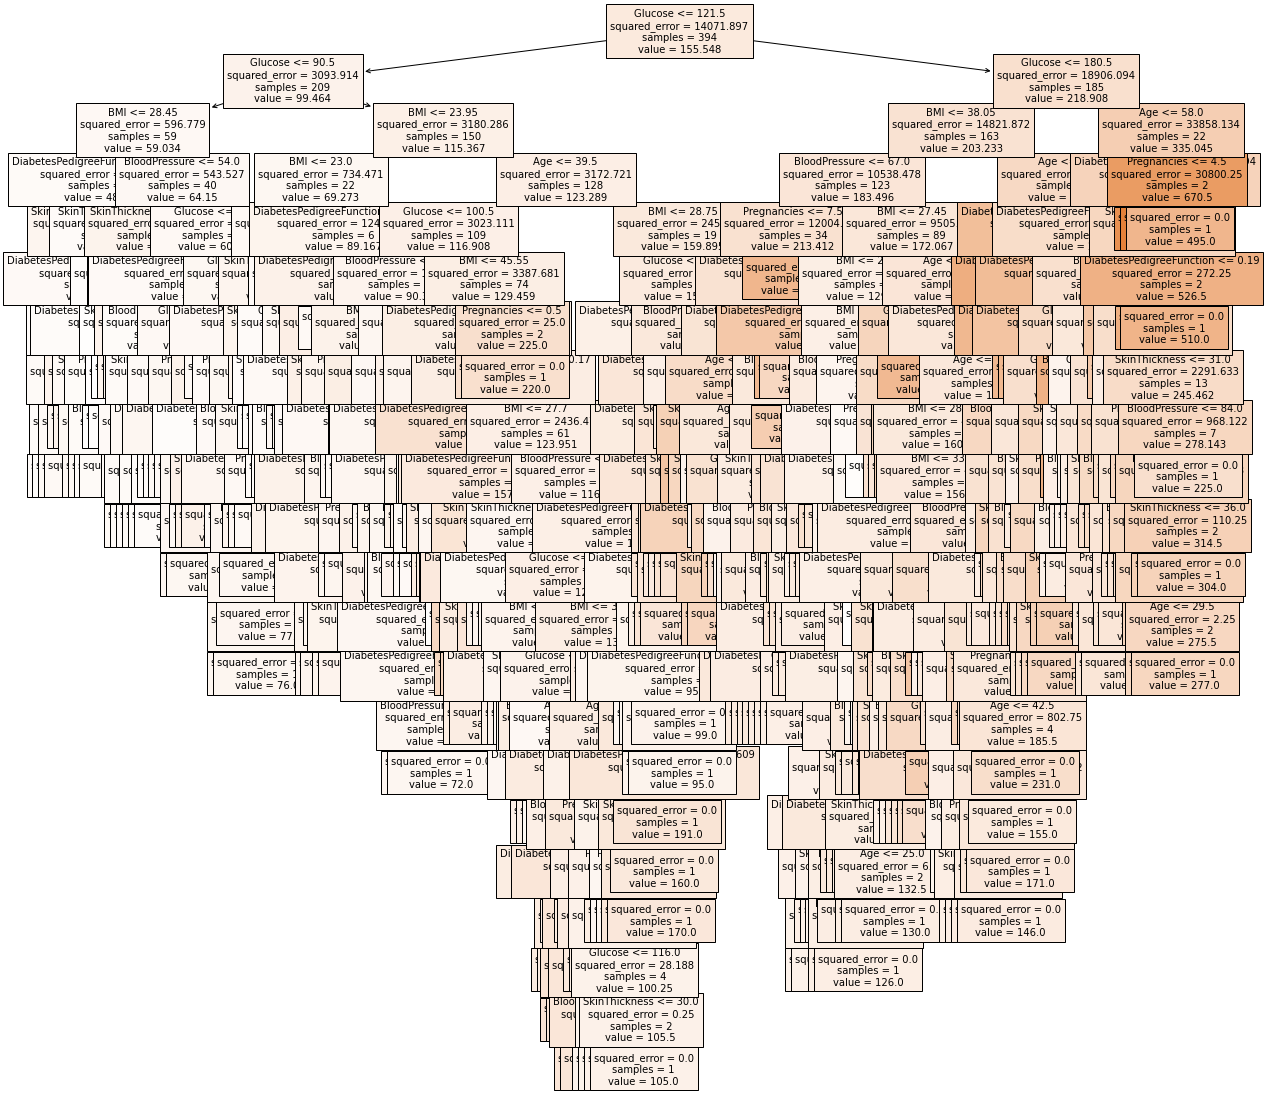

In [ ]:
from sklearn.tree import plot_tree #Plot tree 로 시각화

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

In [ ]:
model.feature_importances_ #feature의 중요도 추출

array([4.20201517e-02, 4.08219914e-01, 6.24932543e-02, 5.97519119e-02,
       1.10296456e-01, 1.63917473e-01, 1.52984660e-01, 3.16179009e-04])

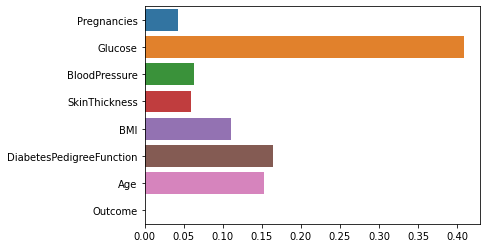

In [ ]:
sns.barplot(x=model.feature_importances_, y=feature_names) # feature의 중요도 시각화

# 예측 & 결과 값 분석

In [ ]:
y_test = model.predict(X_test) #예측하기
y_test[:5]

array([168.,  37., 145.,  36., 182.])

In [ ]:
train.groupby("Outcome")["Insulin"].describe() #예측 결과 비교

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [ ]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 이상치 제거 후 재분석

In [ ]:
desc = train["Insulin"].describe() #Insulin의 요약 값을 desc에 넣어준다. 
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [ ]:
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [ ]:
train = train[train["Insulin"] < 600] #Insulin 값이 600 이하인 값만 따로 분류하여 학습. 
train.shape

(390, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


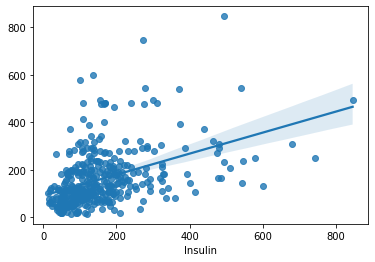

In [ ]:
sns.regplot(y_train, y_predict)

In [ ]:
error = abs(y_train - y_predict)
error.mean()

86.57106598984771

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


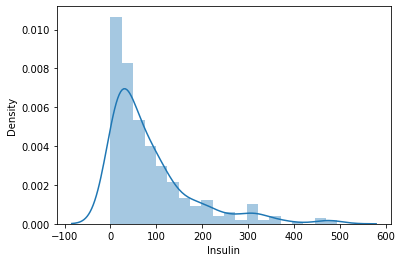

In [ ]:
sns.distplot(error)

In [ ]:
error.describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

In [ ]:
np.sqrt(((y_train - y_predict) ** 2).mean())

126.89512636995443